In [2]:
import pandas as pd
import urllib.request as url
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
path = "https://data.covid19india.org/states_daily.json"
response = url.urlopen(path)

In [4]:
data = json.load(response)

In [5]:
df = pd.DataFrame(data['states_daily'])

In [6]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [7]:
df.tail()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
1558,2,1835,255,857,38,1,114,15-Aug-21,2021-08-15,0,18,0,85,18,257,11,30,110,1611,20089,4,5,3710,278,573,20,1067,102,1043,39,85,13,213,Recovered,582,1842,253,35936,0,36,31,709
1559,0,16,0,10,0,0,1,15-Aug-21,2021-08-15,0,0,0,3,0,3,1,0,2,21,102,0,0,130,7,10,0,3,4,64,2,1,0,0,Deceased,1,23,4,421,0,1,0,12
1560,1,909,165,758,14,2,68,16-Aug-21,2021-08-16,0,27,2,62,14,276,22,35,77,1065,12294,4,6,4145,352,275,7,249,44,868,30,49,11,20,Confirmed,405,1851,52,24696,0,17,18,502
1561,0,1543,249,1014,42,3,224,16-Aug-21,2021-08-16,0,73,0,96,13,334,18,13,135,1486,18542,9,6,5811,649,546,16,954,111,1167,48,86,44,147,Recovered,577,1911,223,36871,0,36,54,691
1562,0,13,0,10,0,0,1,16-Aug-21,2021-08-16,0,0,0,5,0,3,2,0,1,28,142,0,0,100,8,6,1,3,4,66,2,0,0,0,Deceased,3,28,1,438,0,1,1,9


In [9]:
df['dl'].head()

0    7
1    1
2    1
3    0
4    1
Name: dl, dtype: object

In [12]:
# df['dl'].sum()
df['dl'][0]

'7'

In [25]:
df['dl'] = df['dl'].astype('int')
df['mh'] = df['mh'].astype('int')
df['rj'] = df['rj'].astype('int')
df['pb'] = df['pb'].astype('int')
df['up'] = df['up'].astype('int')
df['tt'] = df['tt'].astype('int')

In [26]:
df['dl'].sum()

2873769

In [27]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [28]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [29]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [30]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [31]:
deceased_df['dl'].sum()

25069

In [32]:
deceased_df['up'].sum()

22785

In [33]:
deceased_df['tt'].sum()

432117

In [34]:
confirmed_df['tt'].sum()

32249044

In [35]:
confirmed_df['tt'].max()

414280

In [39]:
confirmed_df.iloc[confirmed_df['tt'].argmax()][['date','tt']]

date    06-May-21
tt         414280
Name: 1254, dtype: object

In [40]:
confirmed_df.iloc[confirmed_df['tt'].argmin()][['date','tt']]

date    17-Mar-20
tt             11
Name: 9, dtype: object

In [41]:
df.groupby('status')['tt'].sum()

status
Confirmed    32249044
Deceased       432117
Recovered    31441098
Name: tt, dtype: int64

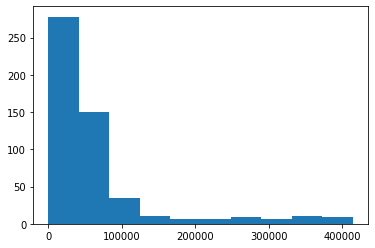

In [42]:
plt.hist(confirmed_df['tt'])
plt.show()

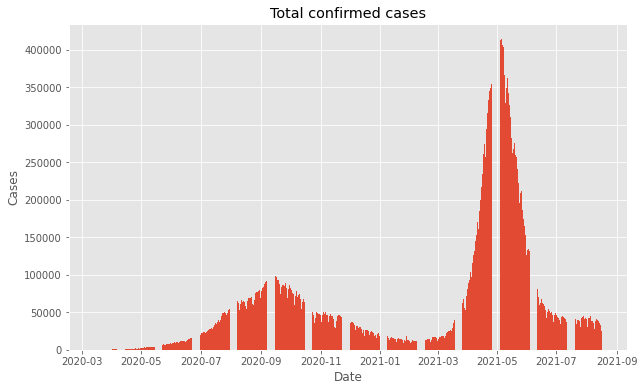

In [47]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(confirmed_df['dateymd'],confirmed_df['tt'])
plt.title('Total confirmed cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

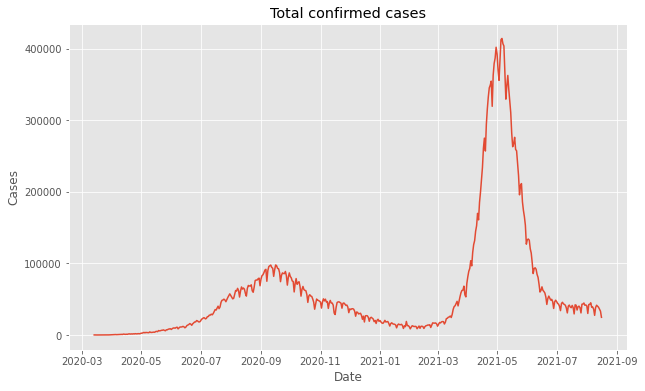

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'],confirmed_df['tt'])
plt.title('Total confirmed cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

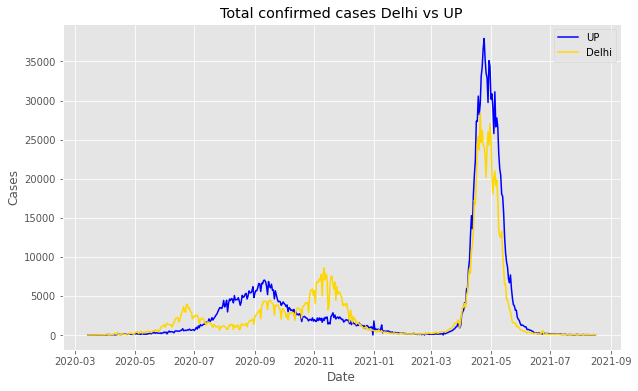

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'],confirmed_df['up'],label='UP',color='blue')
plt.plot(confirmed_df['dateymd'],confirmed_df['dl'],label='Delhi',color='gold')
plt.title('Total confirmed cases Delhi vs UP')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

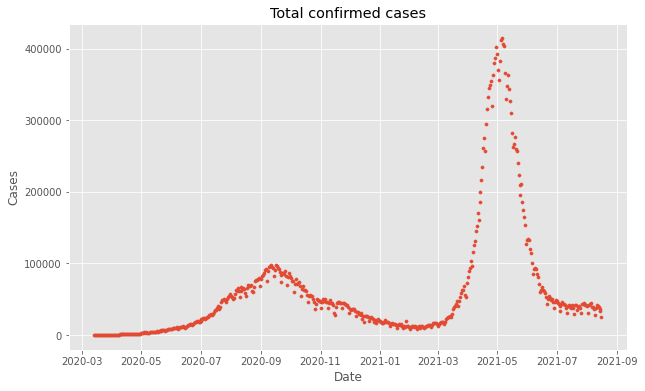

In [53]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(confirmed_df['dateymd'],confirmed_df['tt'],s=10)
plt.title('Total confirmed cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [56]:
top_10 = confirmed_df.sort_values(by='tt', ascending=False).head(10)

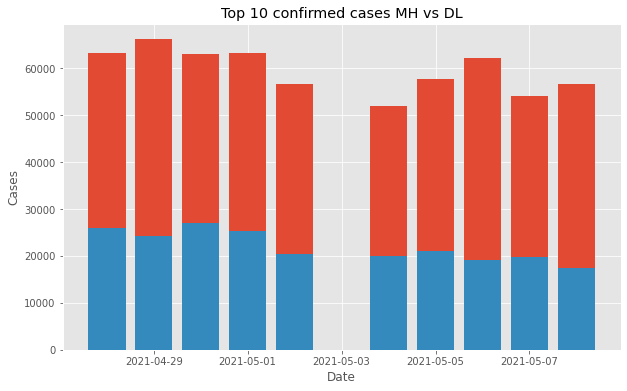

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(top_10['dateymd'], top_10['mh'])
plt.bar(top_10['dateymd'], top_10['dl'])
plt.title('Top 10 confirmed cases MH vs DL')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [65]:
total_cases = [confirmed_df['dl'].sum(),
               confirmed_df['mh'].sum(),
               confirmed_df['up'].sum(),
               confirmed_df['rj'].sum(),
               confirmed_df['pb'].sum(),]

In [66]:
labels = ['DL','MH','UP','RJ','PB']

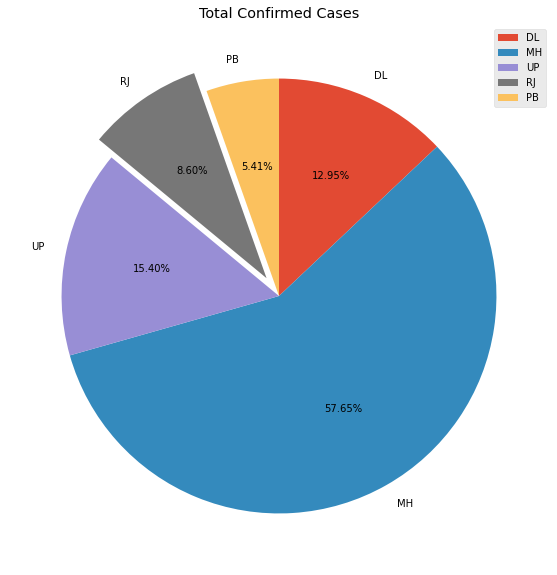

In [79]:
plt.figure(figsize=(10,10))
plt.pie(total_cases, labels=labels,startangle=90,
        counterclock=False, autopct='%1.2f%%',explode=(0,0,0,0.1,0))
plt.legend()
plt.title("Total Confirmed Cases")
plt.show()